## Лабораторная 1 по машинному обучению

### Знакомство с numpy

In [1]:
import numpy as np

##### Задача 1 (0,5 балла). Реализуйте функцию, принимающую на вход матрицу $X$ и два массива $i$ и $j$ одинаковой длины и возвращающую вектор $np.array$, состоящий из последовательности элементов $[X[i[0], j[0]], X[i[1], j[1]], \dots, X[i[N-1], j[N-1]]]$.

In [18]:
def ffff(X, i, j):
    return (X[i,j]).A[0]

In [13]:
X=np.matrix([[1, 2, 3, 0], [4, 5, 6, 0], [7, 8, 9, 0], [10, 11, 12, 0]])
i=np.array([0, 1, 2, 3])
j=np.array([0, 2, 2, 2])
#ffff(X, i,j)
X[i, j]
X[i, j].A
X[i, j].A[0]

array([ 1,  6,  9, 12])

##### Задача 2 (0,5 балла). Напишите функцию для подсчёта произведения ненулевых элементов на диагонали прямоугольной матрицы. Например, для $X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])$ ответом является $3$. Если нулевых элементов нет, функция должна возвращать $None$.

In [33]:
A = np.random.randint (0, 4, (2, 4))
print(A)
def func2(A):
    a=A[range(min(A.shape)), range(min(A.shape))]
    if len(a[a!=0])==0:
        return None
    else:
        return np.prod(a[a!=0])

func2(A)

[[3 1 3 1]
 [3 0 0 1]]


3

##### Задача 3 (0,5 балла). Напишите функцию, возвращающую максимальный элемент в векторе $x$ среди элементов, перед которыми стоит нулевой. Для $x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])$ ответом является $5$.

In [43]:
x = np.array([6,2,0,3,0,0,5,7,0])
def func3(x):
    a = x==0
    return max(x[np.append([False], np.roll(a, 1)[1:])])

print (x)
func3(x)


[6 2 0 3 0 0 5 7 0]


5

##### Задача 4 (0,5 балла). Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для $X = np.arange(0,10).reashape((2, 5))$ и $v = 3.6$ ответом будет $4$.

In [56]:
def func4(A, x):
    return np.ravel(A)[np.argmin((abs(A-x)))]
x = 3
A = np.random.randint (1, 10, (2, 4))
print(A)
func4(A, x)

[[8 8 9 1]
 [5 7 1 9]]


1

##### Задача 5 (1 балл). Написать функцию, которая получает на вход матрицу и масштабирует каждый её столбец, а именно вычитает из столбца его среднее значение и делит столбец на стандартное отклонение. Для тестирования можно сгенерировать с помощью метода $numpy.random.randint$ случайную матрицу и проверить на ней работу метода. Убедитесь, что в функции не будет происходить деления на ноль.

In [69]:
def func5(A):
    std = np.std(A, axis = 0)
    return (A - np.mean(A, axis=0))/np.where(std == 0, 1, std)

A=np.random.randint(10, size=(2,5))
print(A)
func5(A)
    

[[5 8 4 7 2]
 [5 0 7 0 4]]


array([[ 0.,  1., -1.,  1., -1.],
       [ 0., -1.,  1., -1.,  1.]])

##### Задача 6 (1 балл). Реализуйте функцию, которая для заданной матрицы находит: (1) определитель; (2) след; (3) наименьший и наибольший элементы; (4) норму Фробениуса; (5) собственные числа; (6) обратную матрицу. Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal N(10,1)$.

In [76]:
def func6 (X):
    return{'det': np.linalg.det(X),'trace':X.trace(),'max':np.max(X),'min':np.min(X),'norm':np.linalg.norm(X),
           'eigvalues':np.linalg.eigvals(X),'inv':np.linalg.inv(X)}

In [77]:
X=np.random.normal(10,1, size=(2, 2))
X,func6(X)

(array([[  9.98366708,   8.88427496],
        [  7.83988912,  10.86051151]]),
 {'det': 38.776000636864516,
  'eigvalues': array([  2.06482032,  18.77935827]),
  'inv': array([[ 0.28008333, -0.22911788],
         [-0.20218406,  0.25747026]]),
  'max': 10.860511513385649,
  'min': 7.8398891193213043,
  'norm': 18.921377372639817,
  'trace': 20.844178591679395})

##### Задача 7 (1 балл). Повторите $100$ раз следующий эксперимент: сгенерируйте две матрицы размера $10\times 10$ из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? $95$-процентная квантиль? (Данную задачу можно решать, используя цикл для повторения эксперимента)

In [78]:
a=np.zeros(100)
for i in range(100):
    X1=np.random.normal(0,1, size=(10, 10))
    X2=np.random.normal(0,1, size=(10, 10))
    a[i]=np.max(np.dot(X1,X2))

In [79]:
mean=np.mean(a)
q=np.percentile(a, 95)
print(mean,q)

8.35155111101 11.1970818293


### Pandas (анализ данных пассажиров с Титаника)

#### Загрузите данные о пассажирах Титаника из файла titanic.csv 

In [14]:
import pandas as pd
import pylab as plt
import re

In [18]:
url = 'https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/ff414a1bcfcba32481e4d4e8db578e55872a2ca1/titanic.csv'
data = pd.read_csv(url, sep='\t')

##### Задача 1 (1 балл). Опишите данный датасет: какое расределение женщин/мужчин в нем? Сколько пассажиров ехало каким классом? Какой средний/минимальный/максимальный возраст пассажиров? Что можно сказать о количестве выживших пассажиров?

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
Количество женщин и мужчин

In [34]:
data[data['Sex']=='female'].shape[0]

56

In [33]:
data[data['Sex']=='male'].shape[0]

100

In [ ]:
Доля количества женщин и мужчин от числа всех пассажиров

In [37]:
data[data['Sex']=='female'].shape[0]/data.shape[0]

0.358974358974359

In [38]:
data[data['Sex']=='male'].shape[0]/data.shape[0]

0.6410256410256411

In [35]:
data[data['Sex']=='female'].shape[0]/data.shape[0],data[data['Sex']=='male'].shape[0]/data.shape[0]

(0.358974358974359, 0.6410256410256411)

In [ ]:
Группировка количества пассажиров по классам 

In [41]:
data.groupby('Pclass').size()

Pclass
1    30
2    30
3    96
dtype: int64

In [39]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
data.groupby('Pclass').size()

Pclass
1    30
2    30
3    96
dtype: int64

In [ ]:
Средний, минимальный и максимальный возраста

In [42]:
data['Age'].mean()

28.141507936507935

In [43]:
data['Age'].min()

0.83

In [44]:
data['Age'].max()

71.0

In [45]:
data[data['Age']==0.83]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0,NaN,S


In [84]:
data.Age.mean(),data.Age.min(),data.Age.max()

(29.69911764705882, 0.41999999999999998, 80.0)

In [ ]:
Вообще какие возраста бывают

In [46]:
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 ])

In [85]:
data.Age.unique()

array([ 22.  ,  38.  ,  26.  ,  35.  ,    nan,  54.  ,   2.  ,  27.  ,
        14.  ,   4.  ,  58.  ,  20.  ,  39.  ,  55.  ,  31.  ,  34.  ,
        15.  ,  28.  ,   8.  ,  19.  ,  40.  ,  66.  ,  42.  ,  21.  ,
        18.  ,   3.  ,   7.  ,  49.  ,  29.  ,  65.  ,  28.5 ,   5.  ,
        11.  ,  45.  ,  17.  ,  32.  ,  16.  ,  25.  ,   0.83,  30.  ,
        33.  ,  23.  ,  24.  ,  46.  ,  59.  ,  71.  ,  37.  ,  47.  ,
        14.5 ,  70.5 ,  32.5 ,  12.  ,   9.  ,  36.5 ,  51.  ,  55.5 ,
        40.5 ,  44.  ,   1.  ,  61.  ,  56.  ,  50.  ,  36.  ,  45.5 ,
        20.5 ,  62.  ,  41.  ,  52.  ,  63.  ,  23.5 ,   0.92,  43.  ,
        60.  ,  10.  ,  64.  ,  13.  ,  48.  ,   0.75,  53.  ,  57.  ,
        80.  ,  70.  ,  24.5 ,   6.  ,   0.67,  30.5 ,   0.42,  34.5 ,  74.  ])

In [ ]:
Количество и процент выживших

In [47]:
data.groupby('Survived').size()

Survived
0    102
1     54
dtype: int64

In [51]:
data.shape[0]

156

In [55]:
data.groupby('Survived').size()[0]/data.shape[0]

0.6538461538461539

In [54]:
data.groupby('Survived').size()[1]/data.shape[0]

0.34615384615384615

In [86]:
data.groupby('Survived', as_index=False).size()

Survived
0    549
1    342
dtype: int64

In [87]:
data.groupby('Survived', as_index=False).size()/data.shape[0]

Survived
0    0.616162
1    0.383838
dtype: float64

#### Задача 2 (1 балл). Верно ли, что женщины выживали чаще мужчин? Какие пассажиры выживали чаще: с более дешевыми или дорогими билетами? Верно ли, что чаще выживали более молодые пассажиры?

In [57]:
data[data['Survived']==1].groupby('Sex').size()

Sex
female    40
male      14
dtype: int64

In [58]:
data[data['Survived']==1].shape[0]

54

In [59]:
data.groupby(['Survived', 'Sex']).size()

Survived  Sex   
0         female    16
          male      86
1         female    40
          male      14
dtype: int64

In [61]:
data.groupby(['Survived', 'Sex']).mean()

PassengerId    Pclass        Age     SibSp     Parch  \
Survived Sex                                                            
0        female    80.437500  2.937500  20.633333  1.437500  0.562500   
         male      85.639535  2.406977  31.228571  0.523256  0.337209   
1        female    63.200000  2.275000  26.265625  0.650000  0.500000   
         male      76.142857  2.357143  23.314444  0.142857  0.285714   

                      Fare  
Survived Sex                
0        female  18.883331  
         male    28.831587  
1        female  32.291563  
         male    22.270236

In [70]:
data[['Survived', 'Sex']].groupby('Sex').mean()

,Survived
Sex,
female,0.714286
male,0.140000


In [89]:
data.groupby(['Survived','Sex'], as_index=False).size()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

In [ ]:
Частота выживания женщин значительно выше частоты выживания мужчин

In [90]:
data[['Survived','Sex']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
Посмотрим на распределение цен билетов и количества купивших их.

In [74]:
data[['Survived', 'Fare']].groupby('Survived').mean()

,Fare
Survived,
0,27.271076
1,29.693441


In [91]:
data[['Survived','Fare']].groupby(['Survived'], as_index=False).mean()

,Survived,Fare
0,0,22.117887
1,1,48.395408


In [76]:
data[data['Survived']==1]['Fare']

1       71.2833
2        7.9250
3       53.1000
8       11.1333
9       30.0708
10      16.7000
11      26.5500
15      16.0000
17      13.0000
19       7.2250
21      13.0000
22       8.0292
23      35.5000
25      31.3875
28       7.8792
31     146.5208
32       7.7500
36       7.2292
39      11.2417
43      41.5792
44       7.8792
47       7.7500
52      76.7292
53      26.0000
55      35.5000
56      10.5000
58      27.7500
61      80.0000
65      15.2458
66      10.5000
68       7.9250
74      56.4958
78      29.0000
79      12.4750
81       9.5000
82       7.7875
84      10.5000
85      15.8500
88     263.0000
97      63.3583
98      23.0000
106      7.6500
107      7.7750
109     24.1500
123     13.0000
125     11.2417
127      7.1417
128     22.3583
133     26.0000
136     26.2833
141      7.7500
142     15.8500
146      7.7958
151     66.6000
Name: Fare, dtype: float64

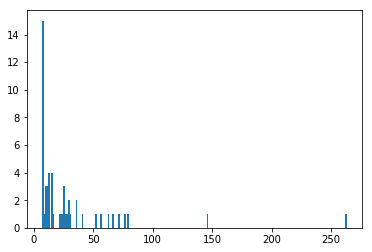

In [86]:
plt.hist(data[data['Survived']==1]['Fare'], bins=200)
plt.show()
#короче, цены выживших отображаем

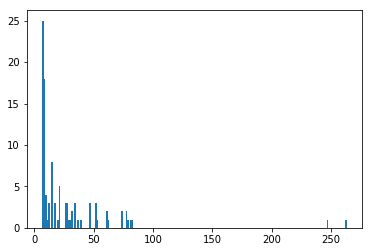

In [87]:
plt.hist(data[data['Survived']==0]['Fare'], bins = 200)
plt.show()

In [83]:
data[data['Survived']==0]['Fare'].min()

6.75

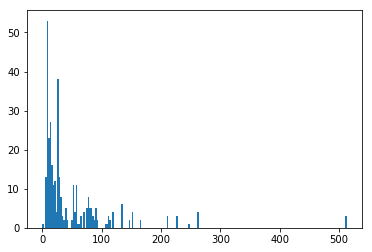

In [94]:
plt.hist(data[data['Survived']==1]['Fare'],bins=200)
plt.show()

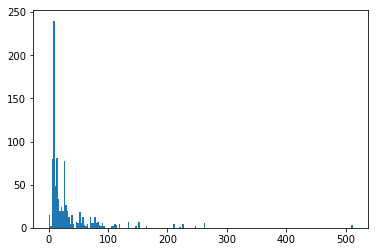

In [95]:
plt.hist(data['Fare'],bins=200)
plt.show()

In [ ]:
Разобьем цены по категориям, т.к. количество различных значений достаточно большое

In [96]:
len(data['Fare'].unique())

248

In [90]:
len(data['Fare'].unique())

93

In [93]:
np.arange(0, 100, 10)

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [96]:
cuts = np.arange(0, 100,10)
pd.cut(data['Fare'], cuts, include_lowest=True).unique()

[(-0.001, 10.0], (70.0, 80.0], (50.0, 60.0], (20.0, 30.0], (10.0, 20.0], (30.0, 40.0], NaN, (80.0, 90.0], (40.0, 50.0], (60.0, 70.0]]
Categories (9, interval[float64]): [(-0.001, 10.0] < (10.0, 20.0] < (20.0, 30.0] < (30.0, 40.0] ... (50.0, 60.0] < (60.0, 70.0] < (70.0, 80.0] < (80.0, 90.0]]

In [97]:
data['Fare_Cat']=pd.cut(data['Fare'], cuts, include_lowest=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(-0.001, 10.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(70.0, 80.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(-0.001, 10.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(50.0, 60.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(-0.001, 10.0]"


In [97]:
cuts = np.arange(0, 600, 10)
pd.cut(data['Fare'], cuts, include_lowest=True).unique()

[[0, 10], (70, 80], (50, 60], (20, 30], (10, 20], ..., (90, 100], (100, 110], (160, 170], (210, 220], (220, 230]]
Length: 21
Categories (21, object): [[0, 10] < (10, 20] < (20, 30] < (30, 40] ... (220, 230] < (240, 250] < (260, 270] < (510, 520]]

In [98]:
data['Fare_category']=(pd.cut(data['Fare'], cuts,include_lowest=True))
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"[0, 10]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(70, 80]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"[0, 10]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(50, 60]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"[0, 10]"


In [ ]:
Видим, что среди пассажиров, купивших дешевый билет, выживаемость низкая. С более дорогим - более высокая.
Билеты остальных категорий приобрело небольшое количество пассажиров, но выживаемость высокая.

In [100]:
fare=data[['Survived','Fare_category']].groupby(['Fare_category'], as_index=False).mean()
fare[fare['Survived'].notnull()]

,Fare_category,Survived
0,"[0, 10]",0.199405
1,"(10, 20]",0.424581
2,"(20, 30]",0.443662
3,"(30, 40]",0.396552
4,"(40, 50]",0.250000
5,"(50, 60]",0.710526
6,"(60, 70]",0.352941
7,"(70, 80]",0.612903
8,"(80, 90]",0.823529
9,"(90, 100]",1.000000


In [101]:
fare_size=data[['Survived','Fare_category']].groupby(['Fare_category'], as_index=False).size()
fare_size[fare_size!=0]

Fare_category
[0, 10]       336
(10, 20]      179
(20, 30]      142
(30, 40]       58
(40, 50]       16
(50, 60]       38
(60, 70]       17
(70, 80]       31
(80, 90]       17
(90, 100]       4
(100, 110]      4
(110, 120]     11
(130, 140]      7
(140, 150]      2
(150, 160]      7
(160, 170]      2
(210, 220]      4
(220, 230]      5
(240, 250]      2
(260, 270]      6
(510, 520]      3
dtype: int64

In [ ]:
По среднем возрасту опять сложно судить о выживаемости пассажиров, поэтому поступим аналогично.

In [102]:
data[['Survived','Age']].groupby(['Survived'], as_index=False).mean()

,Survived,Age
0,0,30.626179
1,1,28.343690


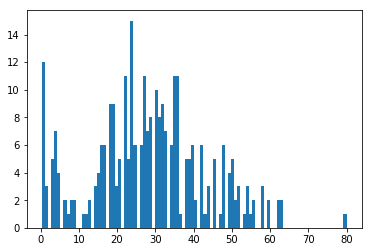

In [103]:
survived=data[data['Survived']==1]
plt.hist(survived[survived['Age'].notnull()]['Age'],bins=100)
plt.show()

In [104]:
cuts = np.arange(0, 85, 5)
pd.cut(data['Age'], cuts, include_lowest=True).unique()

[(20, 25], (35, 40], (25, 30], (30, 35], NaN, ..., (40, 45], (45, 50], (60, 65], (70, 75], (75, 80]]
Length: 17
Categories (16, object): [[0, 5] < (5, 10] < (10, 15] < (15, 20] ... (60, 65] < (65, 70] < (70, 75] < (75, 80]]

In [105]:
data['Age_category']=(pd.cut(data['Age'], cuts,include_lowest=True))
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_category,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"[0, 10]","(20, 25]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(70, 80]","(35, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"[0, 10]","(25, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(50, 60]","(30, 35]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"[0, 10]","(30, 35]"


In [ ]:
Из таблицы видно, что чаще выживали дети. Про молодых людей так однозначно сказать нельзя.

In [106]:
age=data[['Survived','Age_category']].groupby(['Age_category'], as_index=False).mean()
age[age['Survived'].notnull()]

,Age_category,Survived
0,"[0, 5]",0.704545
1,"(5, 10]",0.350000
2,"(10, 15]",0.578947
3,"(15, 20]",0.343750
4,"(20, 25]",0.344262
5,"(25, 30]",0.388889
6,"(30, 35]",0.465909
7,"(35, 40]",0.417910
8,"(40, 45]",0.361702
9,"(45, 50]",0.410256


In [107]:
age_size=data[['Survived','Age_category']].groupby(['Age_category'], as_index=False).size()
age_size[age_size!=0]

Age_category
[0, 5]       44
(5, 10]      20
(10, 15]     19
(15, 20]     96
(20, 25]    122
(25, 30]    108
(30, 35]     88
(35, 40]     67
(40, 45]     47
(45, 50]     39
(50, 55]     24
(55, 60]     18
(60, 65]     14
(65, 70]      3
(70, 75]      4
(75, 80]      1
dtype: int64

In [ ]:
Среди мужчин 15-30 лет выживаемость очень низкая

In [108]:
age_sex=data[['Survived','Sex','Age_category']].groupby(['Sex','Age_category'], as_index=False).mean()
age_sex[age_sex['Survived'].notnull()]

,Sex,Age_category,Survived
0,female,"[0, 5]",0.761905
1,female,"(5, 10]",0.300000
2,female,"(10, 15]",0.750000
3,female,"(15, 20]",0.735294
4,female,"(20, 25]",0.755556
5,female,"(25, 30]",0.750000
6,female,"(30, 35]",0.866667
7,female,"(35, 40]",0.800000
8,female,"(40, 45]",0.611111
9,female,"(45, 50]",0.769231


#### Задача 3 (1 балл). Найдите все признаки, для которых есть пропуски в данных. Обычно алгоритмы по умолчанию не умеют обрабатывать такие данные. Предложите способы обработки данных с пропусками (не менее двух) и укажите их достоинства/недостаки каждого. Проиллюстрируйте их на примере данного датасета.

In [112]:
for i in data.columns:
    if len(data.isnull()[i].unique())==2:
        print(i)

Age
Cabin
Embarked


In [ ]:
Признаки с пропусками 

In [ ]:
Можно заполнить пропуски невозможными значениями - 0 или -1, когда важно, что значения утеряны. Но это может зашумлять


In [113]:
data_zero=data.drop(['Fare_category'],axis=1).fillna(0)
data_zero.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [ ]:
Другой способ - заполнить средним или модой

In [114]:
from copy import deepcopy

In [115]:
data_mean=deepcopy(data)
data_mean['Age'].fillna(data_mean['Age'].mean(), inplace=True)

In [116]:
data['Cabin'].value_counts().idxmax(), data['Embarked'].value_counts().idxmax()

('G6', 'S')

In [117]:
data_mean['Cabin'].fillna(data_mean['Cabin'].value_counts().idxmax(), inplace=True)
data_mean['Embarked'].fillna(data_mean['Embarked'].value_counts().idxmax(), inplace=True)
data_mean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S,"[0, 10]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(70, 80]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S,"[0, 10]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(50, 60]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S,"[0, 10]"


In [ ]:
Можно заполнять не глобальным средним, а средним по группе

In [118]:
data_target=deepcopy(data)
data_target['Age']=data_target[['Age','Survived']].groupby('Survived').transform(lambda x: x.fillna(x.mean()))
data_target['Cabin']=data_target[['Cabin','Survived']].groupby('Survived').transform(lambda x: x.fillna(x.value_counts().idxmax()))
data_target['Embarked']=data_target[['Embarked','Survived']].groupby('Survived').transform(lambda x: x.fillna(x.value_counts().idxmax()))

In [119]:
data_target.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,D26,S,"[0, 10]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(70, 80]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,"[0, 10]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(50, 60]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,D26,S,"[0, 10]"


In [120]:
data_group=deepcopy(data)
data_group['Age']=data_group[['Age','Sex']].groupby('Sex').transform(lambda x: x.fillna(x.mean()))
data_group['Cabin']=data_group[['Cabin','Fare_category']].groupby('Fare_category').transform(lambda x: x.fillna(x.value_counts().idxmax()))
data_group['Embarked']=data_group[['Embarked','Fare_category']].groupby('Fare_category').transform(lambda x: x.fillna(x.value_counts().idxmax()))

In [121]:
data_group.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,F G73,S,"[0, 10]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(70, 80]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,F G73,S,"[0, 10]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(50, 60]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,F G73,S,"[0, 10]"


### Matplotlib

#### Задача 1 (1 балл). Используя следующую функцию для генерации выборки, отобразите на графике синим цветом функцию $y(x)$, а также ее доверительный интервал в виде закрашенной зеленым цветом области от $y[i] - error[i]$ до $y[i] + error[i]$.

In [122]:
def gen_uncertain_data():
    x = np.linspace(0, 30, 100)
    y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
    error = np.random.normal(0.1, 0.02, size=y.shape)
    return x, y, error

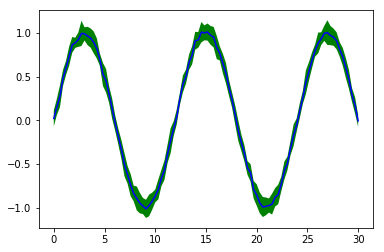

In [123]:
x,y,err=gen_uncertain_data()
plt.plot(x,y,'b')
plt.fill_between(x,y-err,y+err,facecolor='green')
plt.show()

#### Задача 2 (1 балл). Отобразите гистограмму распределения возрастов для каждого класса пассажиров (здесь нужно использовать данные из заданий по $pandas$). В результате вы должны получить три гистограммы, которые необходимо отобразить рядом друг с другом используя функцию $plt.subplots$. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры $figsize, sharey, sharex$ функции $plt.subplots$. Также полезными могут оказаться параметры $bins, normed$ функции $plt.hist$.

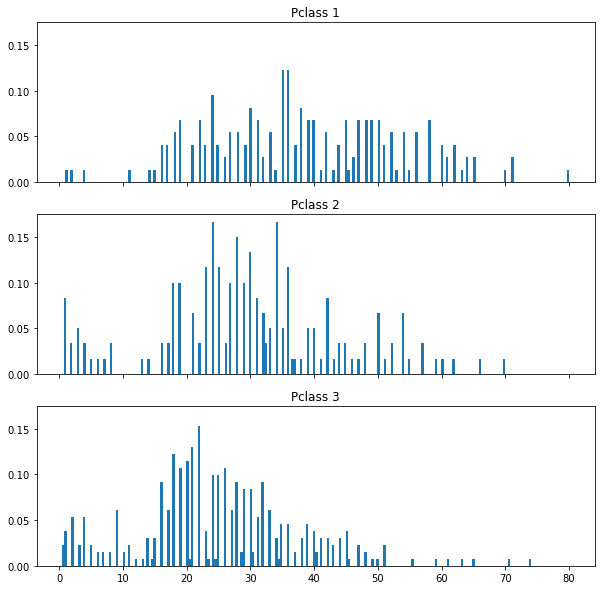

In [124]:
pclass=data.Pclass.unique()
fig, axes = plt.subplots(3,1,sharex='all',sharey='all',figsize=(10,10))
params = dict(bins=200, normed=True)
for i in pclass:
    axes[i-1].hist(data[data['Pclass']==i]['Age'].dropna(),**params)
    axes[i-1].set_title('Pclass %i'%i)

plt.show()